# Logistic Regression



In [23]:
%matplotlib inline

from __future__ import division
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

np.random.seed(0)


data  =  [[ 0.694565    0.42666408]
 [ 1.68353008 -0.80016643]
 [-0.25046823  0.24392224]
 [-1.13337973 -0.6112787 ]
 [ 1.76905577 -0.31025439]
 [ 2.00225511 -0.18592   ]
 [ 0.91169861  0.46995543]
 [ 0.88211794 -0.46701178]
 [ 0.75006972  0.33995342]
 [ 1.30208867 -0.72334923]]
label =  [0 1 1 0 1 1 0 1 0 1]


Text(0.5,1,'Original Data')

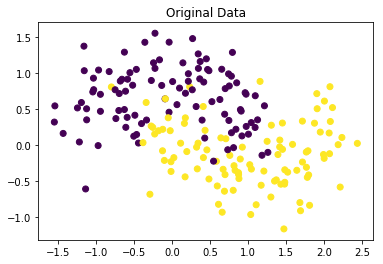

In [21]:
# load sample data
data, label = sklearn.datasets.make_moons(200, noise=0.30)

print("data  = ", data[:10, :])
print("label = ", label[:10])

plt.scatter(data[:,0], data[:,1], c=label)
plt.title("Original Data")

In [12]:
def plot_decision_boundary(predict_func, data, label):
    """画出结果图
    Args:
        pred_func (callable): 预测函数
        data (numpy.ndarray): 训练数据集合
        label (numpy.ndarray): 训练数据标签
    """
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = predict_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.Spectral)
    plt.show()



In [13]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

class Logistic(object):
    """logistic回归模型"""
    def __init__(self, data, label):
        self.data = data
        self.label = label

        self.data_num, n = np.shape(data)
        self.weights = np.ones(n)
        self.b = 1

    def train(self, num_iteration=150):
        """随机梯度上升算法
        Args:
            data (numpy.ndarray): 训练数据集
            labels (numpy.ndarray): 训练标签
            num_iteration (int): 迭代次数
        """
        for j in range(num_iteration):
            data_index = list(range(self.data_num))
            for i in range(self.data_num):
                # 学习速率
                alpha = 0.01
                rand_index = int(np.random.uniform(0, len(data_index)))
                error = self.label[rand_index] - sigmoid(sum(self.data[rand_index] * self.weights + self.b))
                self.weights += alpha * error * self.data[rand_index]
                self.b += alpha * error
                del(data_index[rand_index])

    def predict(self, predict_data):
        """预测函数"""
        result = list(map(lambda x: 1 if sum(self.weights * x + self.b) > 0 else 0,
                     predict_data))
        return np.array(result)


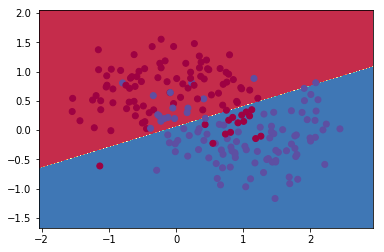

In [14]:
logistic = Logistic(data, label)
logistic.train(200)
plot_decision_boundary(lambda x: logistic.predict(x), data, label)